# 05_A_Software_Comparison_PointCloud

In diesem Jupyter Notebook werden die Punkwolken der Softwareprodukte "Agisoft Metashape" und "Drone2Map" miteinander verglichen. 
Die Daten basieren auf Bilder der DJI Mini 3 Pro von den folgenden Aufnahmetagen:
11.03.2025 

### Import der Libraries

In [48]:
import pandas as pd
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import laspy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from matplotlib.ticker import FuncFormatter

### Definition der Grundlagedaten

In [5]:
# CSV-Verzeichnis
csv_dir = "C:\\_Data\\BTh11\\BTh11_Trieblaengenwachstum\\03_TPF_Statistics\\30_BaseData\\CSV"
print("Daten in CSV-Verzeichnis:", os.listdir(csv_dir))

# PointCloud-Verzeichnis auf HDD
pc_hdd_dir = "F:\\530_PointClouds_TPF"
print("Daten in PointCloud-Verzeichnis (HDD):", os.listdir(pc_hdd_dir))

# PointCloud-Verzeichnis 
pc_dir = r"C:\_Data\BTh11\BTh11_Trieblaengenwachstum\05_Software_Comparison\50_BaseData\PointCloud"
print("Daten in PointCloud-Verzeichnis:", os.listdir(pc_dir))


Daten in CSV-Verzeichnis: ['MetashapeReportData_20250311_DJIMini3Pro_Kirsche.csv', 'MetashapeReportData_20250319_DJIMini3Pro_Kirsche.csv', 'MetashapeReportData_20250326_DJIMini3Pro_Kirsche.csv', 'old']
Daten in PointCloud-Verzeichnis (HDD): ['20250311_DJIMini3Pro_Kirsche_TiePointFiltering_100_clipped.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_20_clipped.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_40_clipped.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_60_clipped.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_80_clipped.las', '20250311_DJIMini3Pro_Kirsche_TiePointFiltering_90_clipped.las']
Daten in PointCloud-Verzeichnis: ['20250311_DJIMini3Pro_Kirsche_TiePointFiltering_80_clipped.las']


## 1. Punktwolkenschnitte

### 1.1 Definition der Baumdimensionen

In [76]:

tree_coord = (2615390.3, 1264898.6)
tree_null = 279.675
cut_height = tree_null + 5
step_height = 1

### 1.2 Punktwolke laden + visualisieren

In [71]:
# === Alle LAS-Dateien im Verzeichnis laden ===
las_files = [f for f in os.listdir(pc_dir) if f.endswith(".las")]
print(f"geladene LAS-Dateien: {las_files}")

geladene LAS-Dateien: ['20250311_DJIMini3Pro_Kirsche_Drone2Map.las', '20250311_DJIMini3Pro_Kirsche_Metashape.las']


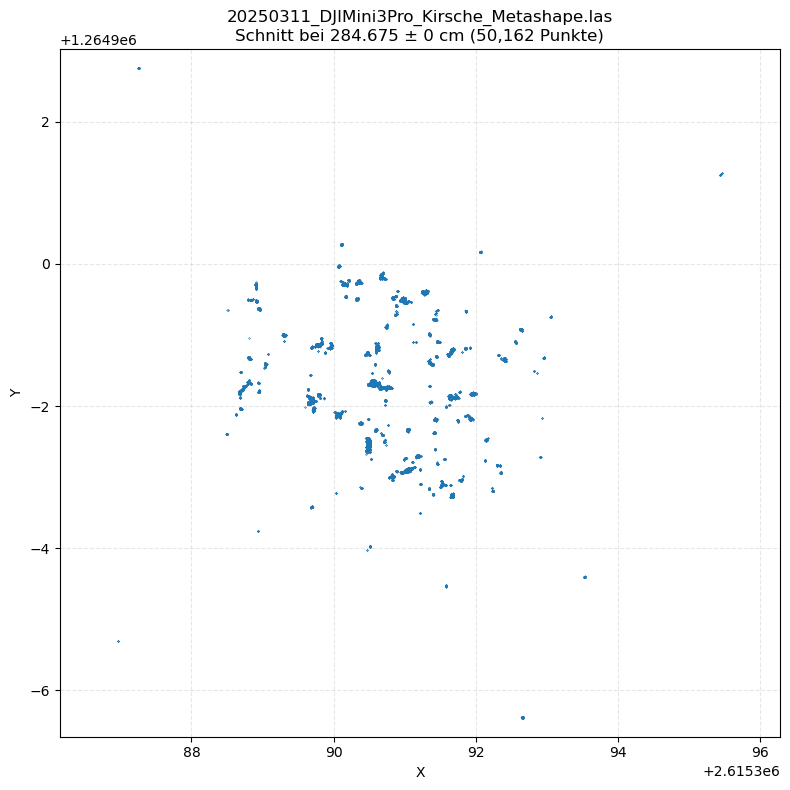

In [77]:
# === Parameter ===
filename = las_files[1]  # z. B. erste Punktwolke aus der Liste
tolerance = 0.005  # Schnittdicke ± in Metern

# === Punktwolke laden
path = os.path.join(pc_dir, filename)
las = laspy.read(path)
x, y, z = las.x, las.y, las.z

# === Maske für horizontalen Schnitt bei Tree_Null ± tolerance
mask = (z >= cut_height - tolerance) & (z <= cut_height + tolerance)

# === Schnelle 2D-Visualisierung in Schwarz
plt.figure(figsize=(8, 8))
plt.scatter(x[mask], y[mask], s=0.03, color="#1f77b4")
plt.title(f"{filename}\nSchnitt bei {cut_height:.3f} ± {tolerance*100:.0f} cm ({np.sum(mask):,} Punkte)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### 1.3 mehrere Punktwolken visualisieren

In [72]:
# === Alle LAS-Dateien im Verzeichnis laden ===
las_files = [f for f in os.listdir(pc_dir) if f.endswith(".las")]
print(f"geladene LAS-Dateien: {las_files}")

geladene LAS-Dateien: ['20250311_DJIMini3Pro_Kirsche_Drone2Map.las', '20250311_DJIMini3Pro_Kirsche_Metashape.las']


2 Punktwolken gefunden:
 ['20250311_DJIMini3Pro_Kirsche_Drone2Map.las', '20250311_DJIMini3Pro_Kirsche_Metashape.las']
20250311_DJIMini3Pro_Kirsche_Drone2Map.las: 476 Punkte im Schnitt


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


20250311_DJIMini3Pro_Kirsche_Metashape.las: 10,678 Punkte im Schnitt


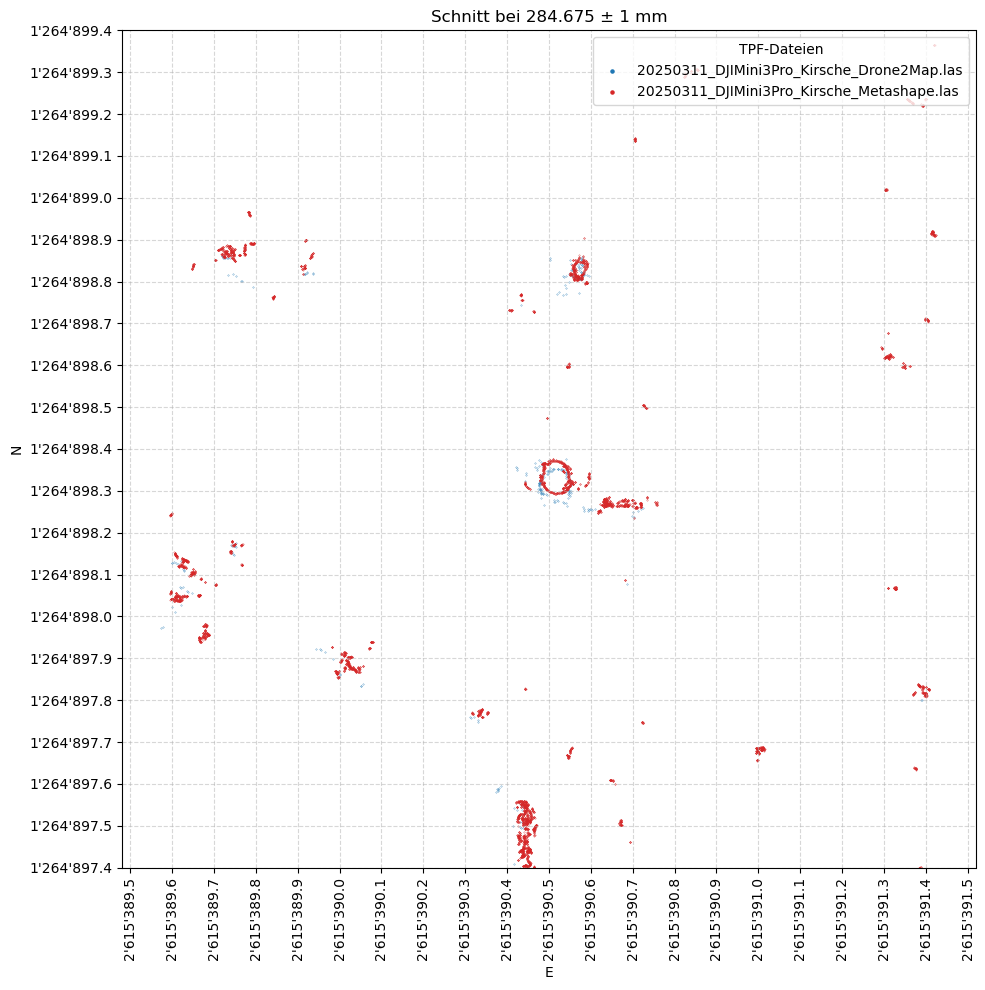

In [65]:
# === Parameter ===
tolerance = 0.001       # ± in Metern
center_x, center_y = tree_coord
view_size = 1  # Meter in jede Richtung vom Mittelpunkt

# === Farben definieren (2 klar unterscheidbare)
colors = ["#1f77b4", "#d62728"]

# === LAS-Dateien laden
las_files = [f for f in os.listdir(pc_dir) if f.endswith(".las")]
print(f"{len(las_files)} Punktwolken gefunden:\n", las_files)

# === Plot vorbereiten
plt.figure(figsize=(10, 10))

for i, filename in enumerate(las_files):
    path = os.path.join(pc_dir, filename)
    try:
        las = laspy.read(path)
        x, y, z = las.x, las.y, las.z
        mask = (z >= cut_height - tolerance) & (z <= cut_height + tolerance)

        # Plotten
        color = colors[i % len(colors)]
        plt.scatter(x[mask], y[mask], s=0.05, color=color, label=filename.replace("_clipped.las", ""))
        print(f"{filename}: {np.sum(mask):,} Punkte im Schnitt")

    except Exception as e:
        print(f"Fehler bei Datei {filename}: {e}")

# === Achsen beschriften & auf Mittelpunkt zentrieren
plt.title(f"Schnitt bei {cut_height:.3f} ± {tolerance*1000:.0f} mm")
plt.xlabel("E")
plt.ylabel("N")
plt.axis("equal")

# Achsgrenzen um Mittelpunkt festlegen
plt.xlim(center_x - view_size, center_x + view_size)
plt.ylim(center_y - view_size, center_y + view_size)

# Tick-Abstände auf 0.1 m setzen
xticks = np.arange(center_x - view_size, center_x + view_size + 0.0001, 0.1)
yticks = np.arange(center_y - view_size, center_y + view_size + 0.0001, 0.1)
plt.xticks(xticks)
plt.xticks(rotation=90)
plt.yticks(yticks)

# Achsenformat mit Tausendertrennzeichen und 1 Nachkommastelle
formatter = FuncFormatter(lambda x, _: f"{x:,.1f}".replace(",", "'"))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Rasterlinien für jede Ticklinie
plt.grid(True, linestyle="--", alpha=0.5, which="both")

plt.legend(title="TPF-Dateien", loc="upper right", markerscale=10)
plt.tight_layout()
plt.show()

### 1.4 Small Multiples von horizontalen Schnitten

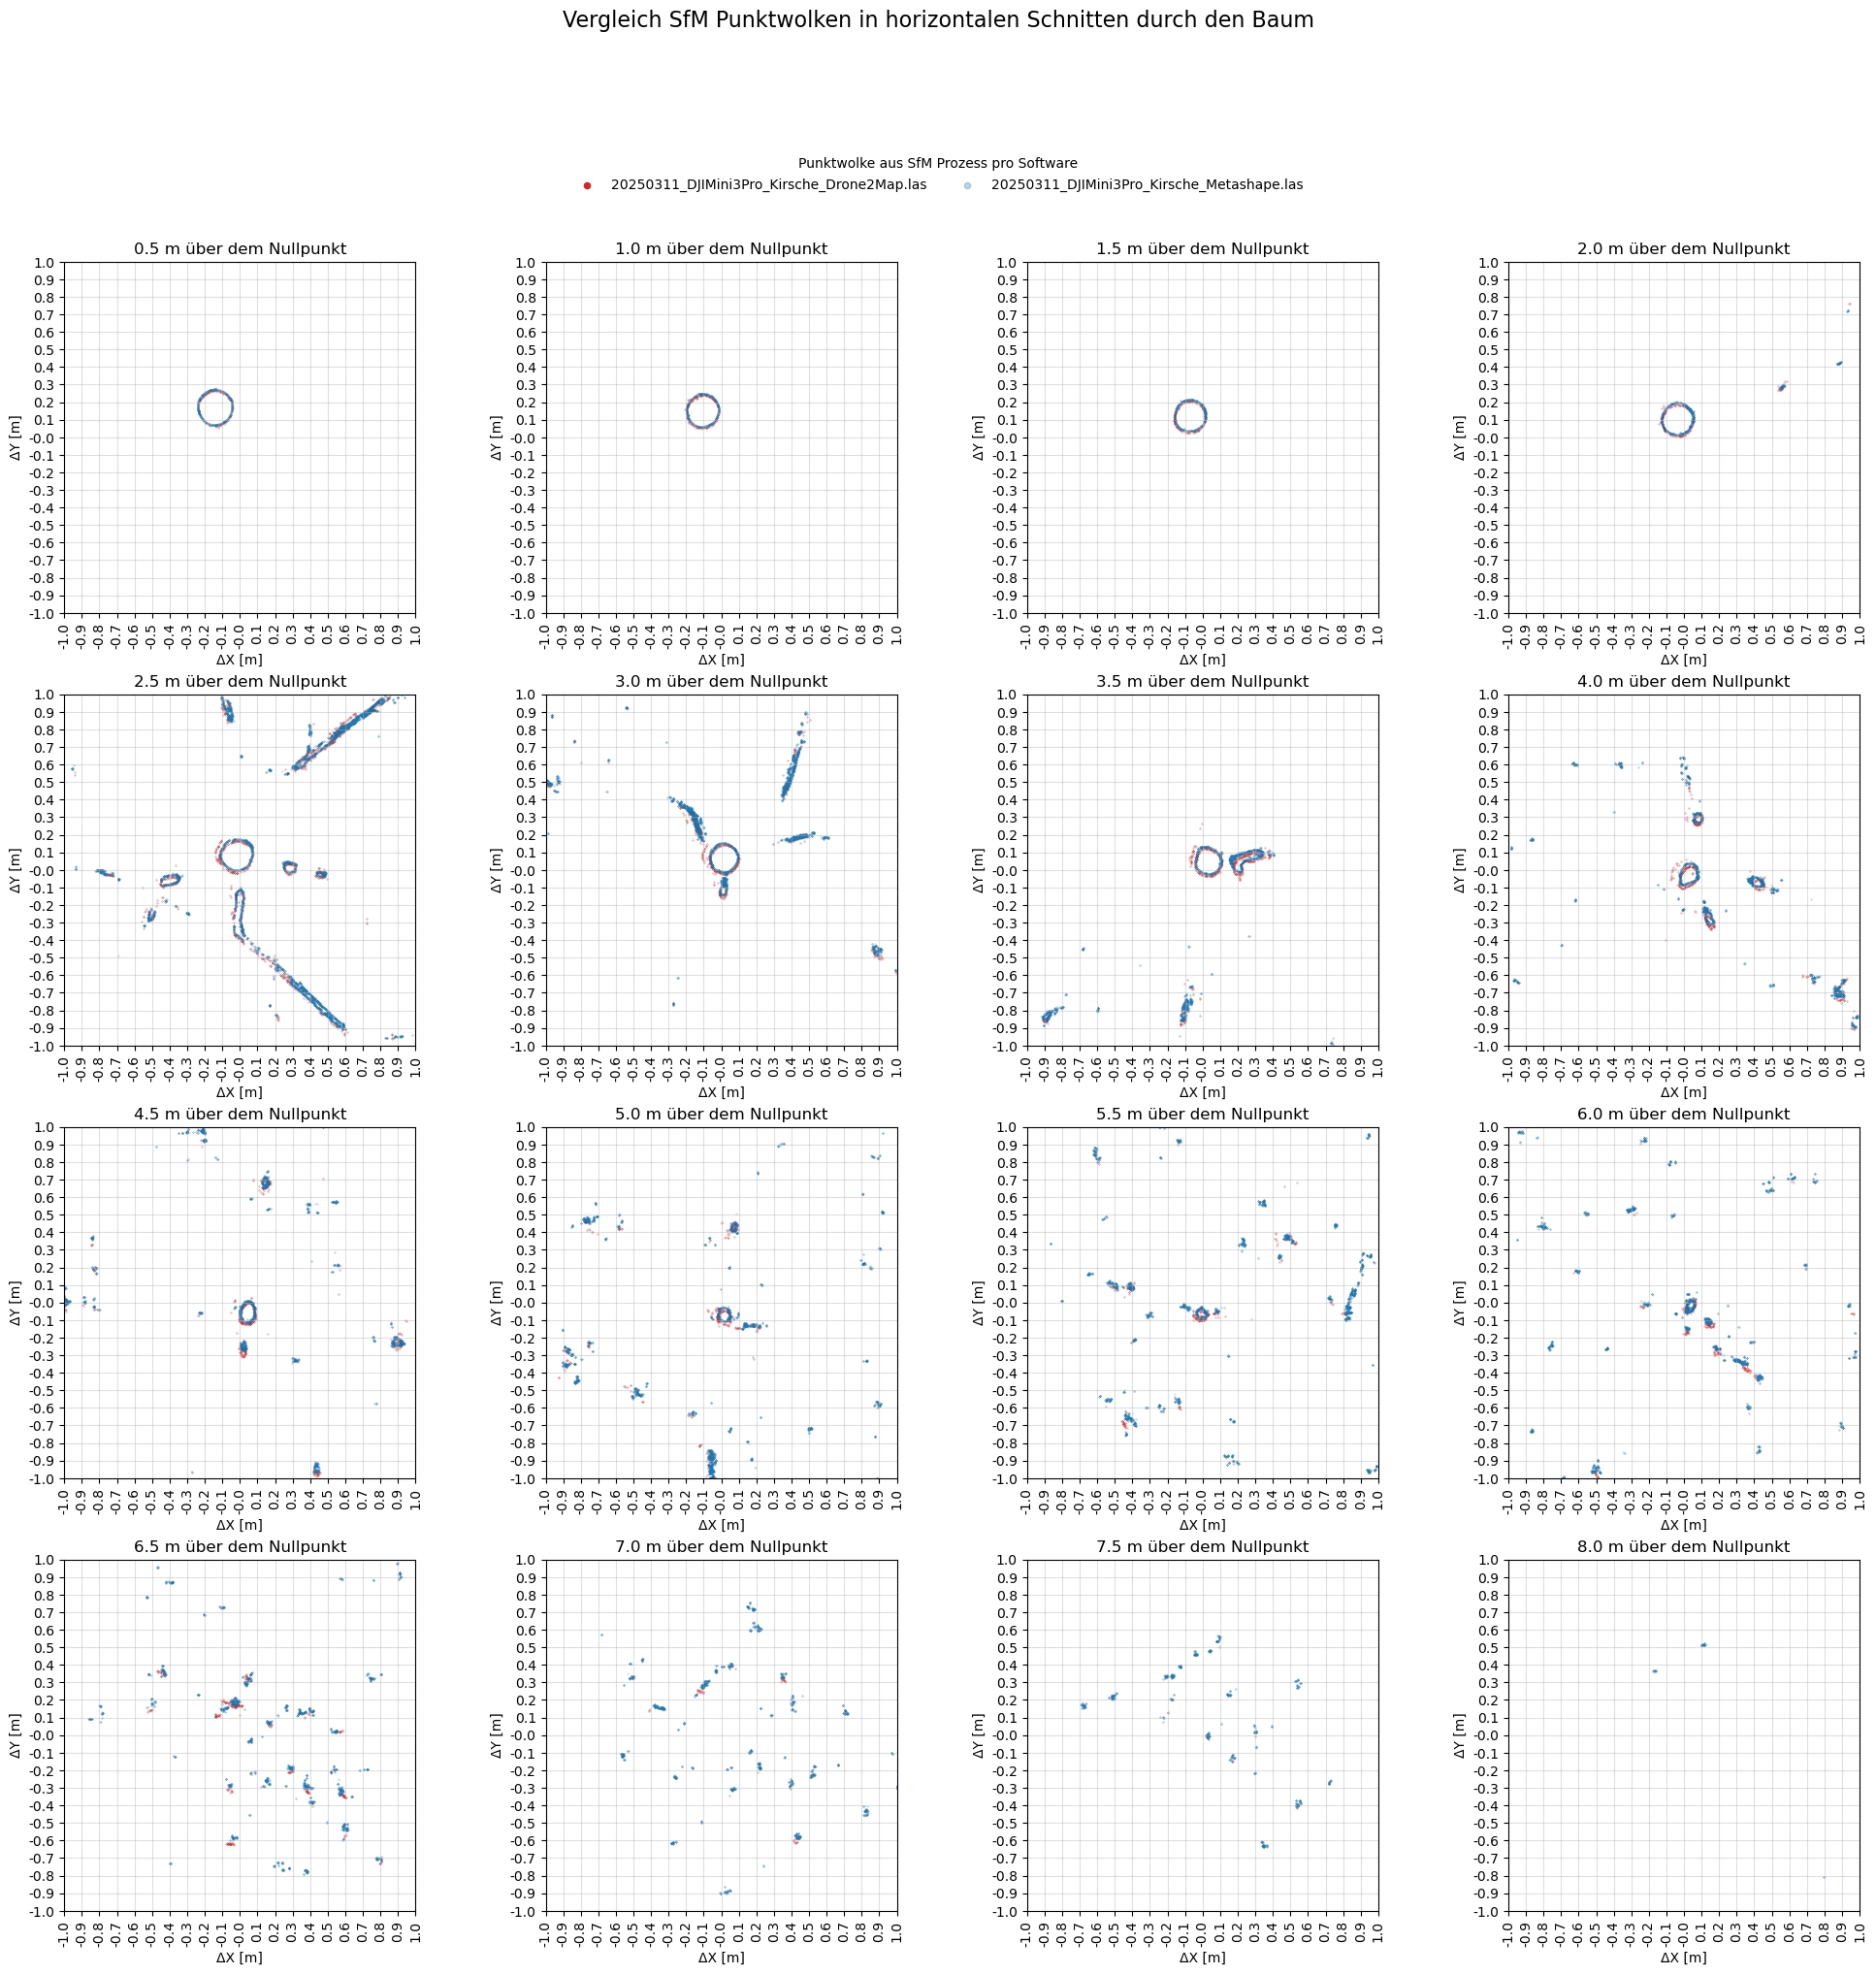

In [88]:
# === Parameter ===
tolerance = 0.001
cut_levels = np.arange(0.5, 8.1, 0.5)  # Schnitthöhen ab tree_null
view_size = 1.0  # m in jede Richtung vom Mittelpunkt
colors = ["#d62728", "#1f77b4"] 
alphas = [1.0, 0.3]

# === Punktwolken laden und relativ verschieben
pointclouds = []
for filename in sorted(las_files):
    path = os.path.join(pc_dir, filename)
    las = laspy.read(path)
    x = np.array(las.x) - center_x
    y = np.array(las.y) - center_y
    z = np.array(las.z)
    pointclouds.append({
        "filename": filename,
        "x": x,
        "y": y,
        "z": z
    })

# === Subplot-Layout vorbereiten
cols = 4
rows = int(np.ceil(len(cut_levels) / cols))
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), squeeze=False)
fig.suptitle("Vergleich SfM Punktwolken in horizontalen Schnitten durch den Baum", fontsize=16, y=1.04)

# === Plots erzeugen
for idx, level in enumerate(cut_levels):
    cut_height = tree_null + level
    row, col = divmod(idx, cols)
    ax = axs[row][col]

    for i, pc in enumerate(pointclouds):
        mask = (pc["z"] >= cut_height - tolerance) & (pc["z"] <= cut_height + tolerance)
        ax.scatter(pc["x"][mask], pc["y"][mask], s=0.05,
                   color=colors[i % len(colors)],
                   alpha=alphas[i % len(alphas)],
                   label=pc["filename"].replace("_clipped.las", ""))

    ax.set_title(f"{level:.1f} m über dem Nullpunkt")
    ax.set_xlim(-view_size, view_size)
    ax.set_ylim(-view_size, view_size)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel("ΔX [m]")
    ax.set_ylabel("ΔY [m]")

    ticks = np.arange(-view_size, view_size + 0.0001, 0.1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.tick_params(axis='x', rotation=90)

    formatter = FuncFormatter(lambda x, _: f"{x:.1f}")
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)

    ax.grid(True, linestyle="-", alpha=0.4)

# === Leere Plots ausblenden
total_subplots = rows * cols
for idx in range(len(cut_levels), total_subplots):
    row, col = divmod(idx, cols)
    fig.delaxes(axs[row][col])

# === Legende unterhalb des Titels
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels,
           title="Punktwolke aus SfM Prozess pro Software",
           loc="upper center", bbox_to_anchor=(0.5, 0.97),
           ncol=len(labels), frameon=False, markerscale=20)

# === Layout anpassen
plt.tight_layout()
plt.subplots_adjust(top=0.91, bottom=0.06)
plt.show()

### 1.5 interaktive horizontale Schnitte

In [3]:
import laspy
import numpy as np
import os
import plotly.graph_objs as go

# === Parameter ===
tolerance = 0.001
cut_levels = np.arange(0.5, 8.1, 0.5)
view_size = 1.0
colors = ["#d62728", "#1f77b4"]
alphas = [1.0, 0.5]

# === Referenzpunkt
tree_null = 279.675
tree_coord = (2615390.524, 1264898.409)
center_x, center_y = tree_coord
pc_dir = r"C:\_Data\BTh11\BTh11_Trieblaengenwachstum\05_Software_Comparison\50_BaseData\PointCloud"
las_files = [f for f in os.listdir(pc_dir) if f.endswith(".las")]

# === Punktwolken laden und verschieben
pointclouds = []
for filename in sorted(las_files):
    path = os.path.join(pc_dir, filename)
    las = laspy.read(path)
    x = np.array(las.x) - center_x
    y = np.array(las.y) - center_y
    z = np.array(las.z)
    pointclouds.append({
        "filename": filename,
        "x": x,
        "y": y,
        "z": z
    })

# === Plotly-Figur erstellen
fig = go.Figure()

# === Alle Schnitte als Traces hinzufügen
for j, level in enumerate(cut_levels):
    cut_height = tree_null + level

    for i, pc in enumerate(pointclouds):
        mask = (pc["z"] >= cut_height - tolerance) & (pc["z"] <= cut_height + tolerance)
        name = pc["filename"].replace("_clipped.las", "")

        fig.add_trace(go.Scattergl(
            x=pc["x"][mask],
            y=pc["y"][mask],
            mode='markers',
            marker=dict(size=3, color=colors[i], opacity=alphas[i]),
            name=name,
            legendgroup=name,
            showlegend=(j == 0),
            visible=(j == 0)
        ))

# === Dropdown-Menü definieren
buttons = []
for j, level in enumerate(cut_levels):
    vis = [False] * len(cut_levels) * len(pointclouds)
    for i in range(len(pointclouds)):
        vis[j * len(pointclouds) + i] = True

    label = f"{level:.1f} m über dem Nullpunkt"
    buttons.append(dict(label=label,
                        method="update",
                        args=[{"visible": vis},
                              {"title": label}]))

# === Layout-Anpassung
fig.update_layout(
    title=f"{cut_levels[0]:.1f} m über dem Nullpunkt",
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.5,
        xanchor="center",
        y=1.12,
        yanchor="top"
    )],
    xaxis=dict(title="ΔX [m]", range=[-view_size, view_size], dtick=0.1,
               showgrid=True, gridcolor="lightgray", zeroline=False),
    yaxis=dict(title="ΔY [m]", range=[-view_size, view_size], dtick=0.1,
               showgrid=True, gridcolor="lightgray", zeroline=False,
               scaleanchor="x"),  # <- ACHSEN PROPORTIONAL
    legend=dict(title="SfM Prozess pro Software", orientation="h", yanchor="bottom", y=-0.25, x=0.5, xanchor="center"),
    plot_bgcolor="white",
    width=800,
    height=800,
    margin=dict(t=100)
)

fig.show()